In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# palette = sns.color_palette("RdBu", 10)
# sns.palplot(sequential_colors)
# sns.set_palette('sequential_colors')
plt.style.use('seaborn-talk')

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
title_basics_df = pd.read_csv ('zippedData/imdb.title.basics.csv.gz')
title_ratings_df = pd.read_csv ('zippedData/imdb.title.ratings.csv.gz')
movie_gross_df = pd.read_csv ('zippedData/bom.movie_gross.csv.gz')
movie_budgets_df = pd.read_csv ('zippedData/tn.movie_budgets.csv.gz')

In [4]:
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [5]:
# movie_budgets_df.head()
def convert_to_int(df, col):
    df[col] = df[col].str.replace('$','').str.replace(',', '').astype('int')
    return df


cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols_to_convert:
    movie_budgets_df = convert_to_int(movie_budgets_df, col)

In [6]:
movie_budgets_df['difference'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']



In [7]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [8]:
# def convert_to_int(df, col):
#     df[col] = df[col].str.replace('$','').str.replace(',', '').astype('int')
#     return df
# cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

# for col in cols_to_convert:
#     movie_budgets_df = convert_to_int(movie_budgets_df, col)

In [9]:
# calculate_world_roi(movie_budgets_df, ['difference'], ['production_budget'])



In [10]:
movie_budgets_df['roi'] = (movie_budgets_df['difference'] / movie_budgets_df['production_budget']) * 100
movie_budgets_df['roi'] = movie_budgets_df['roi'].round(2)


In [11]:
# movie_budgets_df.head()

In [12]:
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df ['release_m'] = movie_budgets_df['release_date'].dt.month
movie_budgets_df ['release_y'] = movie_budgets_df ['release_date'].dt.year
movie_budgets_df.reset_index (drop=True, inplace= True)
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,roi,release_m,release_y
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,553.26,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.67,5,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-57.21,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.38,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.37,12,2017


In [13]:
movie_budgets_df.sort_values(by= ['release_date'], ascending= False, inplace= True)
movie_budgets_df.reset_index(drop= True, inplace= True)

In [14]:
movie_budgets_df[20:220]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,roi,release_m,release_y
20,42,2019-06-14,Men in Black: International,110000000,3100000,3100000,-106900000,-97.18,6,2019
21,98,2019-06-14,Shaft,30000000,600000,600000,-29400000,-98.00,6,2019
22,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-57.21,6,2019
23,35,2019-06-07,Late Night,4000000,246305,246305,-3753695,-93.84,6,2019
24,81,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496,33351496,41.69,6,2019
...,...,...,...,...,...,...,...,...,...,...
215,16,2017-12-31,The Thousand Miles,20000000,0,0,-20000000,-100.00,12,2017
216,50,2017-12-31,Posledniy bogatyr,8500000,0,30700192,22200192,261.18,12,2017
217,23,2017-12-31,Matilda,25000000,0,9370285,-15629715,-62.52,12,2017
218,89,2017-12-31,The Islands,1200000,0,0,-1200000,-100.00,12,2017


In [15]:
# release_year = movie_budgets_df['release_date'].sort_values(ascending=False)
# release_year.head()

In [16]:
# movie_budgets_df.where (movie_budgets_df['worldwide_gross'] == 0)
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,roi,release_m,release_y
0,95,2020-12-31,Moonfall,150000000,0,0,-150000000,-100.0,12,2020
1,6,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000,-100.0,12,2020
2,36,2020-02-21,Call of the Wild,82000000,0,0,-82000000,-100.0,2,2020
3,81,2019-12-31,Army of the Dead,90000000,0,0,-90000000,-100.0,12,2019
4,16,2019-12-31,Eli,11000000,0,0,-11000000,-100.0,12,2019


In [17]:
movie_budgets_df['worldwide_gross']= movie_budgets_df['worldwide_gross'].replace(0, np.nan)
len (movie_budgets_df)

5782

In [18]:
movie_budgets_df.dropna(inplace= True)

In [19]:
len (movie_budgets_df)

5415

In [20]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,roi,release_m,release_y
18,39,2019-06-21,Kursk,40000000,0,4212799.0,-35787201,-89.47,6,2019
20,42,2019-06-14,Men in Black: International,110000000,3100000,3100000.0,-106900000,-97.18,6,2019
21,98,2019-06-14,Shaft,30000000,600000,600000.0,-29400000,-98.00,6,2019
22,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350.0,-200237650,-57.21,6,2019
23,35,2019-06-07,Late Night,4000000,246305,246305.0,-3753695,-93.84,6,2019


In [21]:
movie_budgets_df[movie_budgets_df.movie == 'Cinderella']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,roi,release_m,release_y
872,13,2015-03-13,Cinderella,95000000,201151353,534551353.0,439551353,462.69,3,2015
5733,76,1950-02-15,Cinderella,2900000,85000000,263591415.0,260691415,8989.36,2,1950


In [22]:
movie_budgets_df.sort_values(by= ['release_y'], ascending= False, inplace=True)
movie_budgets_df.reset_index(drop=True, inplace=True)

In [23]:
recent_movie_budgets_df = movie_budgets_df[:2000]

<AxesSubplot:xlabel='release_y', ylabel='roi'>

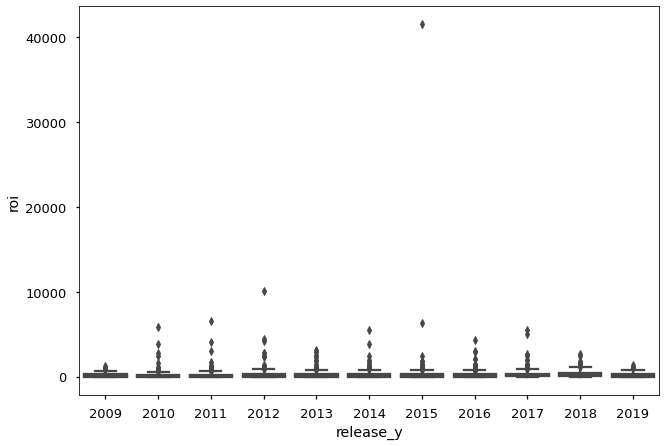

In [24]:
sns.boxplot (x='release_y', y= 'roi', data=recent_movie_budgets_df)
##what is that outlier?!

In [25]:
recent_movie_budgets_df[recent_movie_budgets_df.roi > 30000]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,roi,release_m,release_y
592,80,2015-07-10,The Gallows,100000,22764410,41656474.0,41556474,41556.47,7,2015


The Gallows 
A quick Google search reveals that, yep! The data is accurate and the graph reflects it. 

But it doesn't make for a pretty graph. Let's eliminate it so we can see everything else.

In [26]:
# recent_movie_budgets_df.drop([638], inplace= True)

<AxesSubplot:xlabel='release_y', ylabel='roi'>

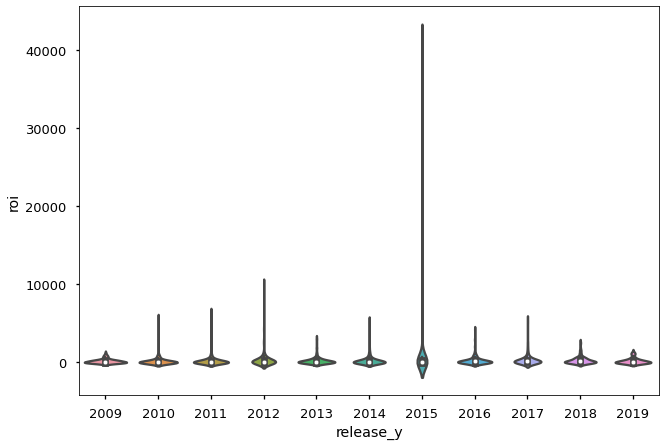

In [27]:
sns.violinplot (x='release_y', y= 'roi', data=recent_movie_budgets_df)

[Text(0.5, 0, 'Released Month'), Text(0, 0.5, 'Counts')]

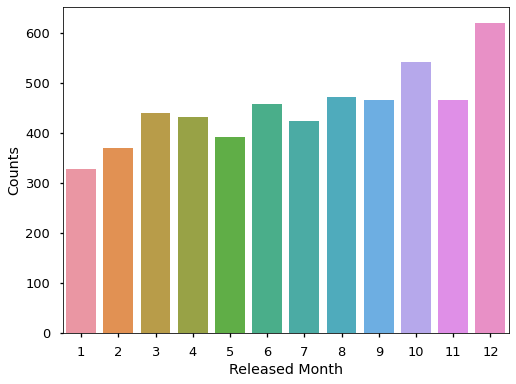

In [28]:
plt.figure(figsize= (8,6))
released_month_img = sns.countplot(x='release_m', data= movie_budgets_df)
released_month_img.set(xlabel='Released Month', ylabel= 'Counts')

Let's merge the cleaned up ROI with the original DataFrame that has the genres in it.

In [29]:
genres_and_roi_df = pd.merge(recent_movie_budgets_df, title_basics_df, how= 'inner', left_on= 'movie', right_on= 'primary_title'  )


In [30]:
# genres_and_roi_df.head()
genres_and_roi_df.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
difference             0
roi                    0
release_m              0
release_y              0
tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes      175
genres                30
dtype: int64

In [31]:
#Drop columns with NaN values before dropping NaN to reduce loss of data for genres
genres_and_roi_df.drop(columns= ['original_title', 'runtime_minutes', 'tconst', 'start_year'], inplace= True)

In [32]:
genres_and_roi_df.dropna(axis=0, inplace= True)

In [33]:
print (len (genres_and_roi_df))
genres_and_roi_df.isna().sum()

2288


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
difference           0
roi                  0
release_m            0
release_y            0
primary_title        0
genres               0
dtype: int64

In [34]:
#Better check for duplicates!
dupd_df = genres_and_roi_df[genres_and_roi_df.duplicated(subset= 'movie')]
dupd_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,roi,release_m,release_y,primary_title,genres
11,88,2019-03-22,Us,20000000,175006930,254210310.0,234210310,1171.05,3,2019,Us,Comedy
12,88,2019-03-22,Us,20000000,175006930,254210310.0,234210310,1171.05,3,2019,Us,"Horror,Mystery,Thriller"
15,81,2019-02-01,Miss Bala,15000000,14998027,15362298.0,362298,2.42,2,2019,Miss Bala,"Action,Crime,Drama"
17,93,2019-01-25,Serenity,25000000,8547045,11367029.0,-13632971,-54.53,1,2019,Serenity,"Drama,Mystery,Sci-Fi"
20,100,2019-01-18,Glass,20000000,111035005,245303505.0,225303505,1126.52,1,2019,Glass,"Crime,Horror,Mystery"
...,...,...,...,...,...,...,...,...,...,...,...,...
2307,59,2009-07-29,Adam,3200000,2283291,2834485.0,-365515,-11.42,7,2009,Adam,"Horror,Thriller"
2308,59,2009-07-29,Adam,3200000,2283291,2834485.0,-365515,-11.42,7,2009,Adam,Comedy
2309,59,2009-07-29,Adam,3200000,2283291,2834485.0,-365515,-11.42,7,2009,Adam,Drama
2310,59,2009-07-29,Adam,3200000,2283291,2834485.0,-365515,-11.42,7,2009,Adam,Action


In [35]:
# Whoa! 684 rows! Let's investigate some.
genres_and_roi_df[genres_and_roi_df.movie == 'Us']
# After checking a few different ones, it looks like all duplicates are exactly that.
# Get 'em outta here!

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,roi,release_m,release_y,primary_title,genres
10,88,2019-03-22,Us,20000000,175006930,254210310.0,234210310,1171.05,3,2019,Us,Drama
11,88,2019-03-22,Us,20000000,175006930,254210310.0,234210310,1171.05,3,2019,Us,Comedy
12,88,2019-03-22,Us,20000000,175006930,254210310.0,234210310,1171.05,3,2019,Us,"Horror,Mystery,Thriller"


In [43]:
genres_and_roi_df.drop_duplicates(subset='movie', inplace= True)
genres_and_roi_df.reset_index(drop=True, inplace=True)
# genres_and_roi_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1604 non-null   int64         
 1   release_date       1604 non-null   datetime64[ns]
 2   movie              1604 non-null   object        
 3   production_budget  1604 non-null   int64         
 4   domestic_gross     1604 non-null   int64         
 5   worldwide_gross    1604 non-null   float64       
 6   difference         1604 non-null   int64         
 7   roi                1604 non-null   float64       
 8   release_m          1604 non-null   int64         
 9   release_y          1604 non-null   int64         
 10  primary_title      1604 non-null   object        
 11  genres             1604 non-null   object        
 12  genres_split       1604 non-null   object        
 13  one_genre          1604 non-null   object        
dtypes: datet

YAY! Now we can work on those genres.

In [37]:
genres_and_roi_df['genres_split'] = genres_and_roi_df['genres'].map (lambda x: x.split(',') if x else x) 
genres_and_roi_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,roi,release_m,release_y,primary_title,genres,genres_split
0,39,2019-06-21,Kursk,40000000,0,4.212799e+06,-35787201,-89.47,6,2019,Kursk,Drama,[Drama]
1,23,2019-02-08,Cold Pursuit,60000000,32138862,6.259916e+07,2599159,4.33,2,2019,Cold Pursuit,"Action,Crime,Drama","[Action, Crime, Drama]"
2,97,2019-03-15,Captive State,25000000,5958315,8.993300e+06,-16006700,-64.03,3,2019,Captive State,"Sci-Fi,Thriller","[Sci-Fi, Thriller]"
3,91,2019-03-15,Five Feet Apart,7000000,45729221,8.050442e+07,73504421,1050.06,3,2019,Five Feet Apart,"Drama,Romance","[Drama, Romance]"
4,96,2019-03-08,Captain Marvel,175000000,426525952,1.123062e+09,948061550,541.75,3,2019,Captain Marvel,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"


In [38]:
all_genres = set ()
for genre in genres_and_roi_df['genres_split']:
    if genre:
        all_genres.update(genre)

In [52]:
y = 'N/A'
genres_and_roi_df['one_genre'] = genres_and_roi_df['genres_split'].map (lambda x: x[0])
genres_and_roi_df['two_genre'] = genres_and_roi_df['genres_split'].map (lambda x: y if len(x) < 2 else x[1])
genres_and_roi_df['three_genre'] = genres_and_roi_df['genres_split'].map (lambda x: y if len (x) < 3 else x[2])

In [55]:
genres_and_roi_df.drop (columns= ['genres', 'genres_split'], inplace= True)
genres_and_roi_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,roi,release_m,release_y,primary_title,one_genre,two_genre,three_genre
0,39,2019-06-21,Kursk,40000000,0,4.212799e+06,-35787201,-89.47,6,2019,Kursk,Drama,N/A,N/A
1,23,2019-02-08,Cold Pursuit,60000000,32138862,6.259916e+07,2599159,4.33,2,2019,Cold Pursuit,Action,Crime,Drama
2,97,2019-03-15,Captive State,25000000,5958315,8.993300e+06,-16006700,-64.03,3,2019,Captive State,Sci-Fi,Thriller,N/A
3,91,2019-03-15,Five Feet Apart,7000000,45729221,8.050442e+07,73504421,1050.06,3,2019,Five Feet Apart,Drama,Romance,N/A
4,96,2019-03-08,Captain Marvel,175000000,426525952,1.123062e+09,948061550,541.75,3,2019,Captain Marvel,Action,Adventure,Sci-Fi


Okay! So now we have three columns for genres. Let's check these puppies out!

<AxesSubplot:title={'center':'Third Genre Listed'}, xlabel='count', ylabel='three_genre'>

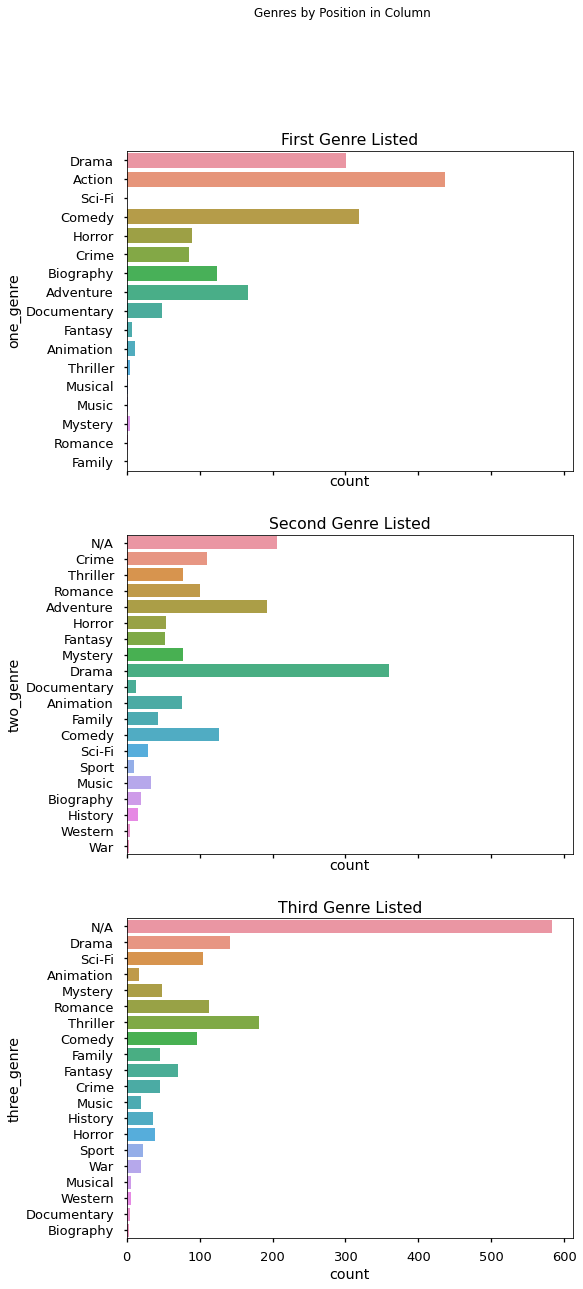

In [125]:
fig, axes = plt.subplots (3, 1, sharex= True, figsize = (8, 20))

fig.suptitle('Genres by Position in Column')

axes[0].set_title ('First Genre Listed')
axes[1].set_title ('Second Genre Listed')
axes[2].set_title ('Third Genre Listed')

sns.countplot (ax= axes[0], y= 'one_genre', data= genres_and_roi_df)
sns.countplot (ax= axes[1], y= 'two_genre', data= genres_and_roi_df)
sns.countplot (ax= axes[2], y= 'three_genre', data= genres_and_roi_df)

In [100]:
grouped_genres_df = genres_and_roi_df.groupby(by= ['one_genre'], as_index= False).sum()
grouped_genres2_df = genres_and_roi_df.groupby(by= ['two_genre'], as_index= False).sum()
grouped_genres3_df = genres_and_roi_df.groupby (by=['three_genre'], as_index= False).sum()

In [91]:
grouped_genres_df.head()

,one_genre,id,production_budget,domestic_gross,worldwide_gross,difference,roi,release_m,release_y
0,Action,22421,35424500000,38605629044,1.071614e+11,71736905800,78848.67,2769,880140
1,Adventure,7649,12776056000,15357553335,4.314298e+10,30366925725,35909.46,1208,334350
2,Animation,522,742500000,1347845252,3.476547e+09,2734046842,2791.67,90,22156
3,Biography,6235,2767520000,4172049505,8.396168e+09,5628648099,26480.78,984,249824
4,Comedy,16576,6846324000,11394603663,2.093208e+10,14085757275,75680.67,2073,640241


<AxesSubplot:title={'center':'Third Genre Listed'}, xlabel='roi', ylabel='three_genre'>

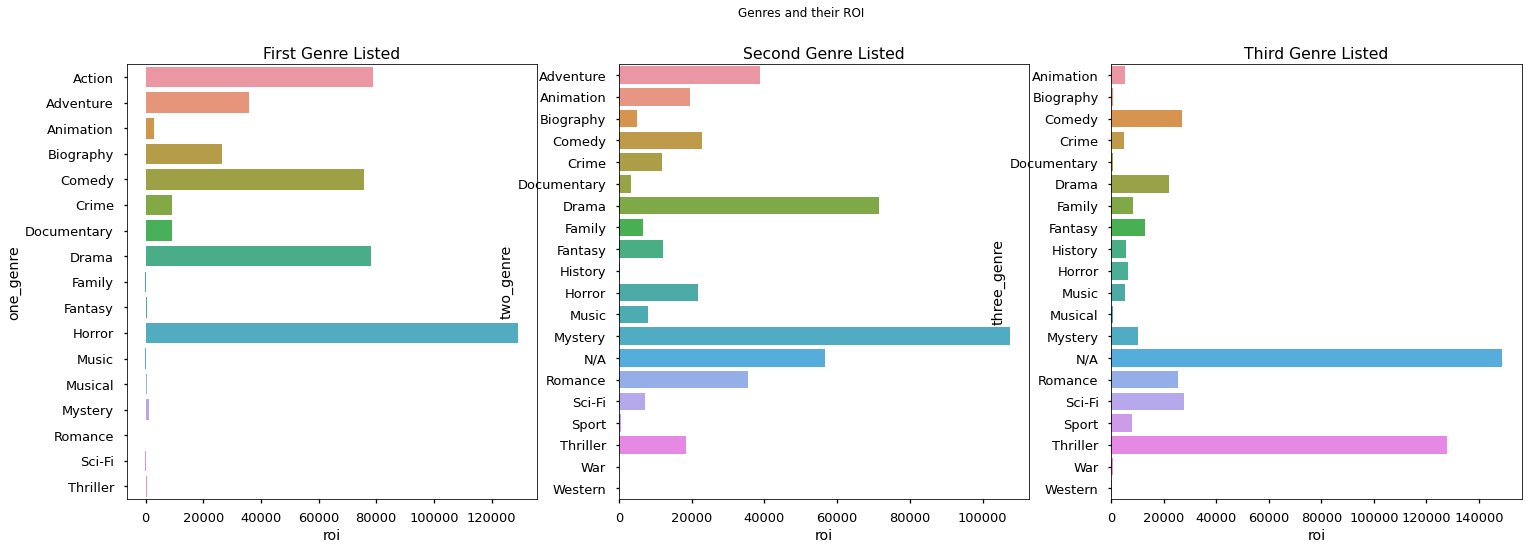

In [117]:
fig, axes = plt.subplots (1, 3, figsize= (25, 8))

fig.suptitle ('Genres and their ROI')
axes[0].set_title ('First Genre Listed')
axes[1].set_title ('Second Genre Listed')
axes[2].set_title ('Third Genre Listed')

sns.barplot (ax= axes[0], x= 'roi', y= 'one_genre', data= grouped_genres_df)
sns.barplot (ax= axes[1], x= 'roi', y= 'two_genre', data= grouped_genres2_df)
sns.barplot (ax= axes[2], x= 'roi', y= 'three_genre', data= grouped_genres3_df)

In [120]:
genres_and_roi_df[genres_and_roi_df.one_genre == 'Horror']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,roi,release_m,release_y,primary_title,one_genre,two_genre,three_genre
9,36,2019-02-08,The Prodigy,6000000,14856291,19789712.0,13789712,229.83,2,2019,The Prodigy,Horror,Thriller,N/A
11,48,2019-02-01,Braid,1660000,0,80745.0,-1579255,-95.14,2,2019,Braid,Horror,Mystery,Thriller
30,72,2019-05-03,The Intruder,8000000,35095904,36005871.0,28005871,350.07,5,2019,The Intruder,Horror,N/A,N/A
33,61,2019-04-05,Pet Sematary,21000000,54724696,109501146.0,88501146,421.43,4,2019,Pet Sematary,Horror,Mystery,Thriller
48,91,2018-04-13,Truth or Dare,3500000,41411015,95127344.0,91627344,2617.92,4,2018,Truth or Dare,Horror,Romance,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,68,2010-10-08,My Soul to Take,25000000,14744435,16727470.0,-8272530,-33.09,10,2010,My Soul to Take,Horror,Mystery,Thriller
1576,69,2010-08-27,Circle,2000000,10024,10024.0,-1989976,-99.50,8,2010,Circle,Horror,Thriller,N/A
1593,71,2010-09-17,Devil,10000000,33679655,63354114.0,53354114,533.54,9,2010,Devil,Horror,Mystery,Thriller
1595,84,2009-05-08,Julia,6000000,65108,1365108.0,-4634892,-77.25,5,2009,Julia,Horror,Thriller,N/A


In [118]:
genres_and_roi_df[genres_and_roi_df.two_genre == 'Mystery']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,difference,roi,release_m,release_y,primary_title,one_genre,two_genre,three_genre
11,48,2019-02-01,Braid,1660000,0,80745.0,-1579255,-95.14,2,2019,Braid,Horror,Mystery,Thriller
14,100,2019-01-18,Glass,20000000,111035005,245303505.0,225303505,1126.52,1,2019,Glass,Drama,Mystery,Thriller
33,61,2019-04-05,Pet Sematary,21000000,54724696,109501146.0,88501146,421.43,4,2019,Pet Sematary,Horror,Mystery,Thriller
40,11,2018-05-18,First Reformed,3500000,3448256,3874772.0,374772,10.71,5,2018,First Reformed,Drama,Mystery,Thriller
81,62,2018-01-12,The Commuter,40000000,36343858,101985431.0,61985431,154.96,1,2018,The Commuter,Action,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,68,2010-10-08,My Soul to Take,25000000,14744435,16727470.0,-8272530,-33.09,10,2010,My Soul to Take,Horror,Mystery,Thriller
1571,50,2010-07-23,Salt,130000000,118311368,290650494.0,160650494,123.58,7,2010,Salt,Action,Mystery,Thriller
1581,2,2010-09-24,Buried,1987650,1044143,21270290.0,19282640,970.12,9,2010,Buried,Drama,Mystery,Thriller
1593,71,2010-09-17,Devil,10000000,33679655,63354114.0,53354114,533.54,9,2010,Devil,Horror,Mystery,Thriller


### WHOA! OKAY! Welp. It looks like if you want to make a decent return on your investment, give making a horror/mystery/thriller a go!

Of course, it's important to point out that a lot of those movies will contain all three of those genres in that order, making them all successes. If the campy horror flicks don't suit you, drama hits high on the list as well.

We saw before that Action/Adventure movies do well in box offices, but it looks like the cost to make them cuts into the profits.